In [2]:
import math
import numpy
import pandas as pd
from eco import simplify_eco, eco_decode, eco_cluster

path = './lichess_2016-09_engineered_df_eco.feather'

df = pd.read_feather(path)
df = df.T
df.head()

ECO,A00,A01,A02,A04,A10,A40,A42,A43,A45,A47,...,D50,D70,D80,E00,E01,E10,E11,E12,E20,E60
White,,,,,,,,,,,,,,,,,,,,,
-ArtanS-,1.0,0.0,0.0,0.0,0.0,0.760000,0.0,1.0,0.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.000000
-LEXX-,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
-chessnoob-,0.0,0.0,0.0,0.0,1.0,0.277778,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.111111
-sayen23-,0.5,0.0,0.0,1.0,0.0,0.444444,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0203,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [3]:
opening_winrates = []
for col in df.columns:
    cur = df[col].to_numpy()
    mask = (cur != 1) & (cur != 0)
    cur = cur[mask]
    winrate = cur.sum() / len(cur)
    opening_winrates.append(winrate)
opening_winrates

[0.4648785741196066,
 0.48517568487870066,
 0.5046312665878432,
 0.515633992640576,
 0.5219381251938585,
 0.5421547078924569,
 0.49906115196729733,
 0.4897154466772012,
 0.47198035801992705,
 0.5326594586642284,
 0.48777363975515936,
 0.488158859369409,
 0.4848951369923302,
 0.5135132240143833,
 0.4844655626602755,
 0.4871055425599564,
 0.5152121323805589,
 0.4999834691070673,
 0.5301790925222013,
 0.5267620715336743,
 0.4962875036332642,
 0.5149415851349031,
 0.5079588287061636,
 0.4937144129703253,
 0.47497067070064897,
 0.5072807120776667,
 0.48289816261894225,
 0.5089670217588396,
 0.5319630527848247,
 0.5243663581787225,
 0.5637297206309849,
 0.5635562679848274,
 0.553955078125,
 0.5288846610205727,
 0.5279833468864206,
 0.5197263302615933,
 0.4976034415207081,
 0.5115051973241738,
 0.5108034583132239,
 0.5356652265537285,
 0.5340731793059907,
 0.5396149431551958,
 0.5293156085628095,
 0.5015837396572104,
 0.4893185839240934,
 0.529706306123604,
 0.5092717988894937,
 0.51496428483

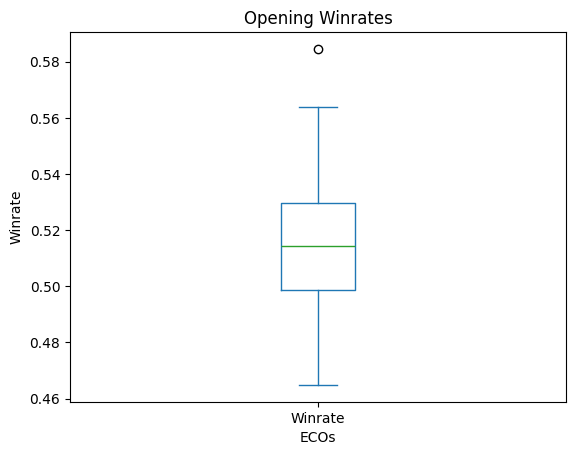

In [4]:
import matplotlib.pyplot as plt

winrate_df = pd.DataFrame(opening_winrates, columns=['Winrate'], index=df.columns)

winrate_df['Winrate'].plot(kind='box')
plt.title('Opening Winrates')
plt.suptitle('')
plt.xlabel('ECOs')
plt.ylabel('Winrate')

plt.savefig('winrate_boxplot.png')
plt.show()

In [5]:
winrate_df[winrate_df['Winrate'] > 0.57]

,Winrate
ECO,
D20,0.58457


In [7]:
pd.set_option('display.max_rows', None)

In [8]:
winrate_df['ECO'] = winrate_df.index
winrate_df['Opening'] = winrate_df['ECO'].apply(eco_decode)

In [11]:
winrate_df = winrate_df.sort_values(by='Winrate', ascending=False)
winrate_df

,Winrate,ECO,Opening
ECO,,,
D20,0.584570,D20,Queen's gambit accepted
E01,0.563807,E01,"Catalan, closed"
C30,0.563730,C30,King's gambit
C40,0.563556,C40,King's knight opening
D06,0.561903,D06,Queen's Gambit
C41,0.553955,C41,Philidor's defence
D30,0.544343,D30,Queen's gambit declined
A40,0.542155,A40,Queen's pawn
C55,0.539615,C55,Two knights defence


In [13]:
winrate_df.sort_values(by='Opening', ascending=True)

,Winrate,ECO,Opening
ECO,,,
B02,0.496288,B02,Alekhine's defence
A57,0.487106,A57,Benko gambit
A60,0.515212,A60,Benoni defence
A56,0.484466,A56,Benoni defence
A02,0.504631,A02,Bird's opening
C23,0.531963,C23,Bishop's opening
E11,0.516316,E11,Bogo-Indian defence
A51,0.484895,A51,Budapest defence
B10,0.493714,B10,Caro-Kann defence


In [14]:
pd.reset_option('display.max_rows')